# :Shark Attack!!!

-----------------------------------------------

# Hypotesis: Shark attacks incidence can vary depending on context: 

### Time
* To analyze the evolution of shark attacks along the time.
* To observe if the seasonality impacts on shark attacks incidence (climat/temperatures).
* To observe if the time hours impacts on shark attacks incidence.

### Geographical area
* To understand if there are differences per area.
* To detect in which hemisphere there are more sharks attacks.

### Activities
* To identify the most common contexts of shark attacks

### Shark species
* To know which shark species are the most aggressive.


### First of all, let's try to embed a shark gif in Jupyter Notebook:

!["shark"](https://media.giphy.com/media/cCvWHbfVdn2bm/giphy.gif "shark")

## Importing everything we need : 

### Importing Pandas, Numpy and Re-gex for data wrangling & analysis

In [1]:
import pandas as pd
import numpy as np
import re

### Importing Matplotlib, Seaborn and wordcloud for data viz (at least to try something xP to do my first chart with Python <3)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Importing Dataset (CSV file) and having a quick look on it

#### First difficulty: the CSV was not encoded in the expected format, so need to encode to our ISO to be able to read it and load to Jupyter Notebook

In [98]:
#Importing data using Pandas
df = pd.read_csv('../GSAF5.csv',encoding = 'ISO-8859-1')

In [4]:
# rows in dataFrame
len(df)

5992

In [5]:
# dataFrame shape: rows and columns
display(df.shape)

(5992, 24)

In [99]:
# checking which variables are in the dataset
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

#### We can see that there are white spaces in texts --> let's remove them:

In [100]:
df = df.rename(columns=lambda x: x.strip())
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

### Checking data quantity and variables type: 
#### The 2 last columns are empty (unamed: 22 and unamed: 23) --> next step: drop them

In [101]:
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
Case Number               5992 non-null object
Date                      5992 non-null object
Year                      5992 non-null int64
Type                      5992 non-null object
Country                   5949 non-null object
Area                      5590 non-null object
Location                  5496 non-null object
Activity                  5465 non-null object
Name                      5792 non-null object
Sex                       5425 non-null object
Age                       3311 non-null object
Injury                    5965 non-null object
Fatal (Y/N)               5973 non-null object
Time                      2779 non-null object
Species                   3058 non-null object
Investigator or Source    5977 non-null object
pdf                       5992 non-null object
href formula              5991 non-null object
href                      5989 non-null object
C

####  We can see that not all registers have data for some relevant variables such as time, age and species

In [9]:
null_cols = df.isnull().sum()
print(null_cols)

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
pdf                          0
href formula                 1
href                         3
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64


#### removing white spaces in values:

In [10]:
# select columns with variables containing strings:
df_obj = df.select_dtypes(['object'])
# strip leading and trailing space: removing spaces from both left and right side of the strings
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
df.head(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2016.09.18.c,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.c-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.c,2016.09.18.c,5993,NaN,NaN
1,2016.09.18.b,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.b-Luciano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.b,2016.09.18.b,5992,NaN,NaN
2,2016.09.18.a,18-Sep-16,2016,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,NaN,"Orlando Sentinel, 9/19/2016",2016.09.18.a-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.18.a,2016.09.18.a,5991,NaN,NaN
3,2016.09.17,17-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Thirteenth Beach,Surfing,Rory Angiolella,M,...,NaN,"The Age, 9/18/2016",2016.09.17-Angiolella.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17,2016.09.17,5990,NaN,NaN
4,2016.09.15,16-Sep-16,2016,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,5989,NaN,NaN
5,2016.09.15.R,15-Sep-16,2016,Boat,AUSTRALIA,Western Australia,Bunbury,Fishing,Occupant: Ben Stratton,NaN,...,NaN,"West Australian, 9/15/2016",2016.09.15.R-boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.15.R,2016.09.15.R,5988,NaN,NaN
6,2016.09.11,11-Sep-16,2016,Unprovoked,USA,Florida,"Ponte Vedra, St. Johns County",Wading,male,M,...,3' to 4' shark,"News4Jax, 9/11/2016",2016.09.11-PonteVedra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.11,2016.09.11,5987,NaN,NaN
7,2016.09.07,07-Sep-16,2016,Unprovoked,USA,Hawaii,"Makaha, Oahu",Swimming,female,F,...,"Tiger shark, 10?","Hawaii News Now, 9/7/2016",2016.09.07-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.07,2016.09.07,5986,NaN,NaN
8,2016.09.06,06-Sep-16,2016,Unprovoked,NEW CALEDONIA,North Province,Koumac,Kite surfing,David Jewell,M,...,NaN,"TVANouvelles, 9/6/2016",2016.09.06-Jewell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.06,2016.09.06,5985,NaN,NaN
9,2016.09.05.b,05-Sep-16,2016,Unprovoked,USA,South Carolina,"Kingston Plantation, Myrtle Beach, Horry County",Boogie boarding,Rylie Williams,F,...,NaN,"C. Creswell, GSAF",2016.09.05.b-Williams.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.05.b,2016.09.05.b,5984,NaN,NaN


#### Case number, pdf, href and href formula, case number. 1 and case number 2, original order and Investigator or Source are not relevant data or empty columns --> we drop them for the analysis

In [115]:
df = df.drop(columns=['Case Number', 'Investigator or Source','pdf','href formula','href','Case Number.1','Case Number.2','original order','Unnamed: 22','Unnamed: 23'])

#### We check our updated dataframe with count, unique, top y freq to have a full overview of all variables and get a quick idea.

In [12]:
df.describe(include = 'O').transpose()

,count,unique,top,freq
Date,5992,5128,1957,11
Type,5992,6,Unprovoked,4386
Country,5949,195,USA,2116
Area,5590,763,Florida,991
Location,5496,3888,"New Smyrna Beach, Volusia County",159
Activity,5465,1464,Surfing,907
Name,5792,5003,male,498
Sex,5425,5,M,4837
Age,3311,149,17,148
Injury,5965,3529,FATAL,738


### checking data quality: how normalized and structured (distinct values) are data in these variables 
#### Type, Sex, Year, Fatal (Y/N), Age, Country, Time, Area are the most structured data.
####  Then, if we work on clean mentions as key words, maybe we can extract a better quality for Activity and Species 

In [13]:
df.nunique()

Date           5128
Year            232
Type              6
Country         195
Area            763
Location       3888
Activity       1464
Name           5003
Sex               5
Age             149
Injury         3529
Fatal (Y/N)       6
Time            350
Species        1458
dtype: int64

In [116]:
# Rename column with several words:
df = df.rename(columns={'Fatal (Y/N)':'Death'})

#### re-ordering the dataset to make more sense to data overview

In [117]:
df = df[['Year', 'Date','Time', 'Country', 'Area','Location','Death','Species','Injury', 'Type','Activity', 'Sex', 'Age','Name']]
df.head(10)

,Year,Date,Time,Country,Area,Location,Death,Species,Injury,Type,Activity,Sex,Age,Name
0,2016,18-Sep-16,13h00,USA,Florida,"New Smyrna Beach, Volusia County",N,NaN,Minor injury to thigh,Unprovoked,Surfing,M,16,male
1,2016,18-Sep-16,11h00,USA,Florida,"New Smyrna Beach, Volusia County",N,NaN,Lacerations to hands,Unprovoked,Surfing,M,36,Chucky Luciano
2,2016,18-Sep-16,10h43,USA,Florida,"New Smyrna Beach, Volusia County",N,NaN,Lacerations to lower leg,Unprovoked,Surfing,M,43,male
3,2016,17-Sep-16,NaN,AUSTRALIA,Victoria,Thirteenth Beach,N,NaN,Struck by fin on chest & leg,Unprovoked,Surfing,M,NaN,Rory Angiolella
4,2016,16-Sep-16,NaN,AUSTRALIA,Victoria,Bells Beach,N,2 m shark,No injury: Knocked off board by shark,Unprovoked,Surfing,M,NaN,male
5,2016,15-Sep-16,NaN,AUSTRALIA,Western Australia,Bunbury,N,NaN,Shark rammed boat. No injury to occupant,Boat,Fishing,NaN,NaN,Occupant: Ben Stratton
6,2016,11-Sep-16,15h15,USA,Florida,"Ponte Vedra, St. Johns County",N,3' to 4' shark,Minor injury to arm,Unprovoked,Wading,M,60s,male
7,2016,07-Sep-16,14h30,USA,Hawaii,"Makaha, Oahu",N,"Tiger shark, 10?",Severe lacerations to shoulder & forearm,Unprovoked,Swimming,F,51,female
8,2016,06-Sep-16,15h40,NEW CALEDONIA,North Province,Koumac,Y,NaN,FATAL,Unprovoked,Kite surfing,M,50,David Jewell
9,2016,05-Sep-16,Late afternoon,USA,South Carolina,"Kingston Plantation, Myrtle Beach, Horry County",N,NaN,Lacerations & punctures to lower right leg,Unprovoked,Boogie boarding,F,12,Rylie Williams


In [16]:
#replace all NaN values to "UNKNOWN"
df.fillna('UNKNOWN', inplace = True) 
null_cols = df.isnull().sum()
#check
print(null_cols[null_cols > 0])

Series([], dtype: int64)


## SHARK ATTACKS EVOLUTION: 

### YEAR - exploratory analysis

In [17]:
df['Year'].value_counts().tail(20)

1755    1
1767    1
1771    1
1779    1
1787    1
1803    1
1749    1
1807    1
1811    1
1819    1
1805    1
1831    1
1555    1
1738    1
1859    1
1742    1
1758    1
1818    1
1822    1
1595    1
Name: Year, dtype: int64

In [18]:
# YEAR - checking statistics summary to get the minimum year with 4 digits format
df['Year'].describe()

count    5992.000000
mean     1925.204606
std       286.473712
min         0.000000
25%      1942.000000
50%      1975.000000
75%      2003.000000
max      2016.000000
Name: Year, dtype: float64

### Data cleaning: we only keep data after the minimum year with correct format (4 digits). Due to data collection methods, better to focus on quality than quantity.
### If the year is not well registered, we can assume that this is not a good quality report of the attack incident.

In [19]:
df = df.loc[df['Year'] >= 1942]
df['Year'].describe()

count    4503.000000
mean     1987.082834
std        22.191686
min      1942.000000
25%      1965.000000
50%      1993.000000
75%      2007.000000
max      2016.000000
Name: Year, dtype: float64

### EVOLUTION analysis: We can see that there was a significant peak in 1960, which then descreased (1980). But from 1990, the shark attacks are increasing continously.

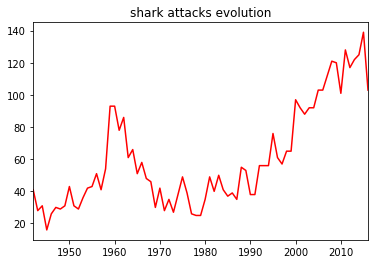

In [20]:
# my first plot with Matplotlib
evolution = df['Year'].value_counts().sort_index()
evolution.plot(title="shark attacks evolution",color='red')

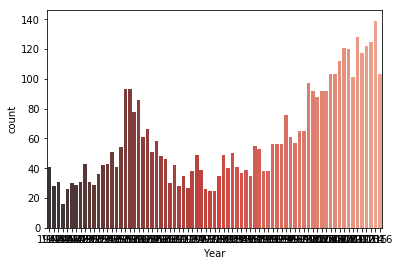

In [21]:
# my first plot with Seaborn
sns.countplot(x="Year", data=df,palette="Reds_d")

### FATALITY - exploratory analysis

In [22]:
death_analysis = df['Death'].value_counts()
death_analysis = death_analysis.reset_index()
death_analysis.columns = ['Death', 'Attacks']
death_analysis

,Death,Attacks
0,N,3585
1,Y,857
2,UNKNOWN,61


In [154]:
# Defining cleaning function:
def death_cleaning(x):
    if x == 'N'or x=='Y':
        return x
    else:
        return 'UNKNOWN'
# Applying cleaning function to Variable:
df['Death'] = df['Death'].apply(death_cleaning)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]), <a list of 75 Text xticklabel objects>)

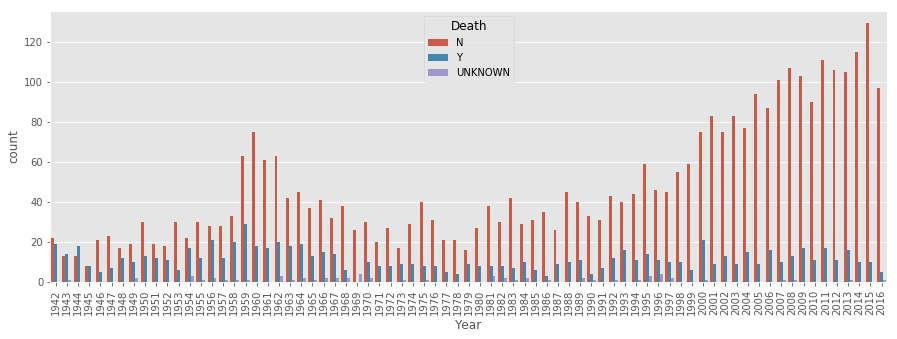

In [25]:
plt.figure(figsize=(15, 5))
style.use('ggplot')
sns.countplot(x='Year', hue = 'Death', data = df)
plt.xticks(rotation=90)

## Even if number of shark attacks have increased in the last 25 years, we can see they are not related to death consequence

### TYPE OF INCIDENT - exploratory analysis

In [26]:
df['Type'].value_counts()

Unprovoked      3324
Provoked         433
Invalid          369
Boat             194
Sea Disaster     143
Boating           40
Name: Type, dtype: int64

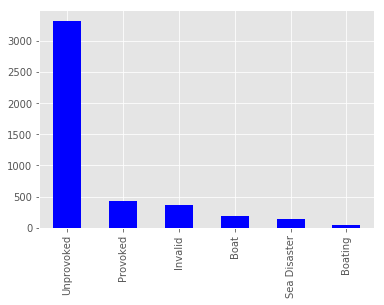

In [27]:
attack_type=df['Type'].value_counts()
attack_type.plot.bar(color='blue')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

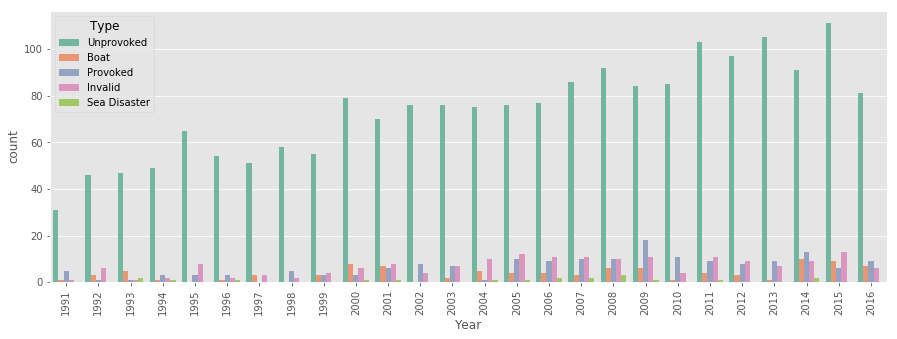

In [156]:
df2=df[df['Year']>1990]
plt.figure(figsize=(15, 5))
style.use('ggplot')
sns.countplot(x='Year', hue = 'Type', data = df2, palette="Set2")
plt.xticks(rotation=90)

## The unprovoked shark attacks are the ones increasing in the last 30 years.

### DATE variable: exploratory analysis & data cleaning

In [29]:
# Then we can check how are the DATE format in the oldest values of YEAR (25% quartile --> 1942-1966) 
df.loc[(df['Year'] >= 1942)& (df['Year'] <= 1966)].tail(10) 

,Year,Date,Time,Country,Area,Location,Death,Species,Injury,Type,Activity,Sex,Age,Name
4494,1942,Winter 1942,UNKNOWN,AUSTRALIA,Tasmania,Off Big Friar Island,N,UNKNOWN,"No injury to occupants, rudder damaged by shark",Boating,Fishing for perch,M,UNKNOWN,Storm King; occupants - George Bridge & 2 sons
4495,1942,Summer 1942,UNKNOWN,PHILIPPINES,Camiguin Island,2 kilometres off Sagay,Y,UNKNOWN,FATAL,Unprovoked,"Sailing from Gingood, Misamis Oriental to Saga...",M,UNKNOWN,Andong & 2 others
4496,1942,1942,UNKNOWN,SOUTH AFRICA,Western Cape Province,Simons Bay,N,UNKNOWN,"No injury to occupants, boat rammed by shark",Boating,UNKNOWN,UNKNOWN,UNKNOWN,boat
4497,1942,1942,UNKNOWN,SOUTH AFRICA,Western Cape Province,Simon's Bay,N,Said to involve a 6.5 m [21.5'] shark,No injury,Boating,UNKNOWN,UNKNOWN,UNKNOWN,boat
4498,1942,1942,Late afternoon,BAHAMAS,Cay Sal Bank,Anchored off the largest island in the group,N,1.2 m to 1.5 m [4' to 5'] shark,"Minor injury, ankle scratched by shark's teeth",Unprovoked,Swimming along side N.E.L. vessel Saluda,M,48,Herbert J. Mann
4499,1942,1942,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,Y,UNKNOWN,FATAL,Sea Disaster,Jumped overboard from torpedoed Panamanian fre...,M,UNKNOWN,male
4500,1942,1942,UNKNOWN,MID-PACIFC OCEAN,(Southwestern Pacific),UNKNOWN,N,UNKNOWN,"Fingers badly lacerated, wounds became septic",Sea Disaster,"Plane forced down, 3 men on rubber life raft. ...",M,UNKNOWN,Gene Aldrich
4501,1942,1942,UNKNOWN,SOUTHWEST PACIFIC OCEAN,UNKNOWN,UNKNOWN,N,"Said to be leopard sharks, more probably tig...","No injury to occupants, They fought off sharks...",Sea Disaster,Ditched plane in the sea & were adrift on a ru...,M,UNKNOWN,American aviators
4502,1942,1942,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,N,UNKNOWN,No injury to occupants. Sharks continually fol...,Boating,"Days before the surrender of Singapore, the 3 ...",M,UNKNOWN,"Bombardier J. Hall, Private Green of the Sherw..."
4503,1942,1942,UNKNOWN,PANAMA,Panama City,Bella Vista Beach,Y,UNKNOWN,"FATAL, body not recovered",Unprovoked,Swimming,M,UNKNOWN,male


In [139]:
df['Date'].value_counts()

1957                                           11
1942                                            9
1956                                            8
1958                                            7
1941                                            7
1950                                            7
1949                                            6
No date                                         6
1959                                            5
1954                                            5
No date, Before 1963                            5
28-Jul-95                                       5
1955                                            5
1940                                            5
05-Oct-03                                       5
12-Apr-01                                       5
Oct-60                                          5
Aug-56                                          5
1970s                                           5
Before 1906                                     4


### For Seasonality analysis : Convert DATE into MONTH
####  Data Cleaning & Manipulation: We already have the year so we will try to extract the month from the date (removing digits of day/year) --> in case we can observe some seasonality

In [141]:
# defining a function to clean detecting year format in date column:
def cleaning_date(x):
    pattern1 = '[0-9]+|reported|late|between|early|winter|summer|and|mid' 
    xbis = re.sub(pattern1,'', x.lower())
    pattern2 = '[^jan|^feb|^mar|^apr|^may|^jun|^jul|^aug|^sep|^oct|^nov|^dec]'
    new_x = re.sub(pattern2,'', xbis)
    month_list = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
    if new_x in month_list:
        return new_x
    else:
        return 'NaN'

# we apply the cleaning date function and rename the variable to month
df['Month'] = df['Date'].apply(cleaning_date)

In [142]:
df['Month'].value_counts()

jul    625
aug    578
NaN    563
sep    518
jan    496
jun    471
dec    418
oct    408
apr    404
mar    394
nov    392
may    366
feb    359
Name: Month, dtype: int64

### to see if there is some seasonality and put month as axe x in a graph, it would be easier to use numbers, so let's convert data into numbers: 

In [143]:
df['Month_num'] = df['Month']

In [144]:
months_map = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12, 'NaN':0}
def mapper(month):
    return months_map[month]
df['Month_num'] = df['Month_num'].apply(mapper)

In [145]:
df['Month_num'].value_counts()

7     625
8     578
0     563
9     518
1     496
6     471
12    418
10    408
4     404
3     394
11    392
5     366
2     359
Name: Month_num, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

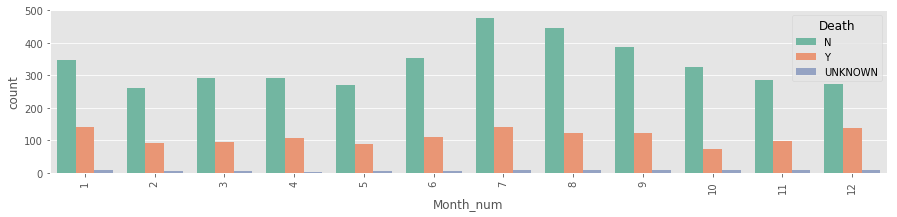

In [157]:
df2=df[df['Month_num']>0]
plt.figure(figsize=(15, 3))
style.use('ggplot')
sns.countplot(x='Month_num', hue = 'Death', data = df2, palette="Set2")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

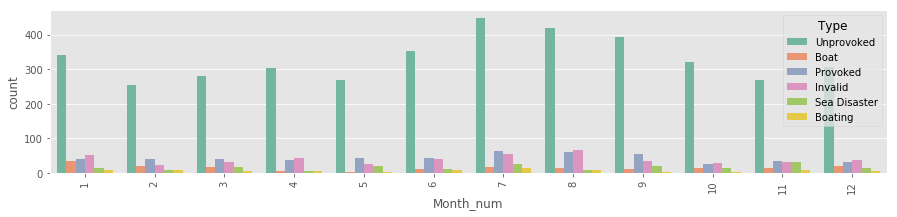

In [158]:
df2=df[df['Month_num']>0]
plt.figure(figsize=(15, 3))
style.use('ggplot')
sns.countplot(x='Month_num', hue = 'Type', data = df2, palette="Set2")
plt.xticks(rotation=90)

### We can see that Summer (from June to September, and also in January), there are more shark attacks: this can be due to holidays & summer activities: it could be interesting to show this seasonality per hermisphere/top countries to observe nuances.

In [45]:
# AGE - exploratory analysis
df['Age'].value_counts()

UNKNOWN                    1522
19                          122
17                          121
15                          120
18                          120
20                          120
16                          118
21                          104
22                          101
24                           96
25                           94
14                           86
13                           76
28                           73
26                           72
29                           71
27                           70
23                           70
30                           67
32                           62
35                           60
12                           60
31                           49
10                           46
40                           43
34                           43
43                           40
36                           39
38                           38
33                           37
                           ... 
"young" 

In [46]:
# AGE: Data cleaning and Manipulation:
#df['Age']=df['Age'].astype(str)
# --> ValueError: invalid literal for int() with base 10: 'NaN'

# Defining Age cleaning function:
def age_cleaning(x):
    try:
        if len(str(x))<=2:
            return int(x) 
        else:
            return 'NaN'
    except:
        return 'NaN'

# df['Age'].astype(int) --> ValueError: cannot convert float NaN to integer
# we apply the cleaning date function to age var
df['Age'] = df['Age'].apply(age_cleaning)

In [47]:
# AGE - checking cleaning results
df['Age'].value_counts()

NaN    1605
19      122
17      121
18      120
20      120
15      120
16      118
21      104
22      101
24       96
25       94
14       86
13       76
28       73
26       72
29       71
23       70
27       70
30       67
32       62
12       60
35       60
31       49
10       46
34       43
40       43
43       40
36       39
38       38
33       37
       ... 
54       13
58       12
6        12
53       11
59       11
61       11
56        9
63        9
62        8
69        8
68        6
5         6
70        5
65        4
77        3
71        3
66        3
64        3
74        2
75        2
3         2
73        1
78        1
81        1
84        1
72        1
86        1
67        1
87        1
1         1
Name: Age, Length: 80, dtype: int64

In [48]:
# AGE - exploratory analysis
df['Age'].describe()

count     4503
unique      80
top        NaN
freq      1605
Name: Age, dtype: object

In [49]:
avg_age = round(df['Age'][(df['Age']!='NaN')].mean())
print(avg_age)

28.0


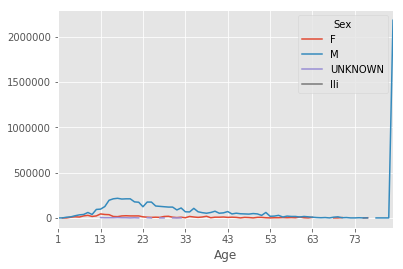

In [67]:
evolution = pd.pivot_table(df, index=df.Age, columns='Sex',values='Year', aggfunc='sum')
evolution.plot()

### People attacked by Sharks were mostly between 13 and 33 years old: 28 y.o. on average.

### Gender: SEX variable - exploratory analysis & data cleaning

In [68]:
df['Sex'].value_counts()

M          3575
F           499
UNKNOWN     428
lli           1
Name: Sex, dtype: int64

In [69]:
# SEX - looking missing data together with other variables to see if we could assign gender --> NOT FEASIBLE
df.loc[(df['Sex'] != 'M') & (df['Sex'] != 'F')]

,Year,Date,Time,Country,Area,Location,Death,Species,Injury,Type,Activity,Sex,Age,Name,Month,Month_num,Age_data
5,2016,15-Sep-16,UNKNOWN,AUSTRALIA,Western Australia,Bunbury,None,UNKNOWN,Shark rammed boat. No injury to occupant,Boat,Fishing,UNKNOWN,NaN,Occupant: Ben Stratton,sep,9,NaN
29,2016,17-Jul-16,UNKNOWN,USA,Alabama,8 miles off Mobile,None,"Tiger shark, 10'","No injury, shark bit trolling motor",Boat,Fishing in Alabama Deep Fishing Rodeo,UNKNOWN,NaN,Occupant: Ben Raines,jul,7,NaN
81,2016,13-Mar-16,Morning,USA,California,"Bolsa Chica State Park, Orange County",None,Shark involvement not confirmed,Board reportedly bumped by shark. No injury,Invalid,Surfing,UNKNOWN,NaN,unknown,mar,3,NaN
109,2015,13-Dec-15,10h30,AUSTRALIA,New South Wales,Lake Macquarie,None,"White shark, 3.5 m","No injury, shark rammed boat & bit motor",Boat,Fishing,UNKNOWN,NaN,6 m boat: occupants Stephen & Andrew Crust,dec,12,NaN
225,2015,15-Feb-15,UNKNOWN,ATLANTIC OCEAN,UNKNOWN,UNKNOWN,None,White shark,"No injury, shark bit rudder",Boat,Transatlantic Rowing,UNKNOWN,NaN,"Avalon, a carbon kevlar monohull: 8 occupants",feb,2,NaN
241,2014,29-Dec-14,Morning,AUSTRALIA,New South Wales,Bherwerre Beach,None,2 m shark,Lacerations to both feet,Unprovoked,Surfing,UNKNOWN,NaN,Jeff Brown,dec,12,NaN
243,2014,28-Dec-14,UNKNOWN,GREECE,UNKNOWN,33 nautical miles off Othonoi Island,None,Shark involvement prior to death still to be d...,"Of 9 bodies recovered, one was bitten by a shark",Sea Disaster,UNKNOWN,UNKNOWN,NaN,Passenger ferry Norman Atlantic,dec,12,NaN
244,2014,28-Dec-14,Morning,SOUTH AFRICA,KwaZulu-Natal,Durban,None,Shark involvement not confirmed & highly unlikely,Minor cuts on feet,Invalid,Swimming,UNKNOWN,NaN,"5 people claimed to have been injured by a ""ba...",dec,12,NaN
254,2014,Reported 17-Nov-2014,UNKNOWN,USA,California,"Franklin Point, San Mateo County",None,White shark,"Shark bumped boat, no injury to occupants",Boat,UNKNOWN,UNKNOWN,NaN,Boat: occupants: Matt Mitchell & 2 other people,nov,11,NaN
285,2014,29-Aug-14,16h18,USA,Florida,"Atlantic Beach, Duval County",None,Shark involvement not confirmed,Shark involvement not confirmed,Invalid,UNKNOWN,UNKNOWN,NaN,child,aug,8,NaN


In [70]:
# SEX - Defining Gender cleaning function:
def gender_cleaning(x):
    if x == 'F'or x=='M':
        return x
    else:
        return 'UNKNOWN'
# Applying Gender cleaning function to the Sex Column:
df['Sex'] = df['Sex'].apply(gender_cleaning)

In [71]:
# SEX - checking data
df['Sex'].value_counts()

M          3575
F           499
UNKNOWN     429
Name: Sex, dtype: int64

### Men are more exposed to shark attacks, probably due to their higher involvement in activities linked to this kind of incidents.

In [119]:
df['Country'].value_counts().head(20)

USA                 2116
AUSTRALIA           1279
SOUTH AFRICA         565
PAPUA NEW GUINEA     133
NEW ZEALAND          125
BRAZIL               102
BAHAMAS               98
MEXICO                82
ITALY                 71
FIJI                  65
PHILIPPINES           60
REUNION               57
NEW CALEDONIA         51
MOZAMBIQUE            44
CUBA                  42
SPAIN                 40
EGYPT                 38
INDIA                 37
CROATIA               34
JAPAN                 32
Name: Country, dtype: int64

In [120]:
# strip leading and trailing space: removing spaces from both left and right side of the strings
def whitespace_upper(x): 
    for i in x:
        x_new = str(x.upper().strip())
    return x_new
df['Country'] = df['Country'].astype('category').apply(whitespace_upper)

### USA, Australia, South Africa, Papua New Guinea are the Countries with more shark attacks. Then, Brazil & Bahamas are the following ones. In Europe, the most risked country is Italy.

### Data Manipulation: Enriching raw data trying to assign the correspondant hemisphere to each country:
* First, I build a list of countries for each hemisphere, then I assign the country to its correspondant hemisphere.

In [126]:
north = "USA, Afghanistan,Austria,Algeria,Andorra,Antigua and Barbuda,Albania,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bosnia and Herzegovina,Brunei,Bulgaria,Cambodia,Cape Verde,Colombia,Costa Rica,Côte d’Ivoire,Croatia,Cuba,Cyprus,Czech Republic,Denmark,Djibouti,Dominica,Dominican Republic,Egypt,Equatorial Guinea,Eritrea,Estonia,Finland,Armenia,Liberia,Libya,Burkina Faso,Cameroon,Burma (Myanmar),Canada,Central African Republic,Chad,China,China PR,Chinese Taipei (Taiwan),El Salvador,Ethiopia,Federated States of Mcronesia,France,Gambia,Georgia,Germany,Ghana,Great Britain (United Kingdom),Greece,Grenada,Guatemala,Guinea,Guinea-Bissau,Guyana,Guyane (French Guiana),Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Japan,Iran,Iraq,Isle of Man,Israel,Italy,Jamaica,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Liechtenstein,Lithuania,Luxembourg,Macedonia (F.Y.R.O.M.),Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Nepal,Netherlands,Nicaragua,Niger,Nigeria,North Korea,Norway,Oman,Pakistan,Palau,Panama,Peru,Poland,Portugal,Puerto Rico,Romania,Russia,Russian Federation,Qatar,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Korea,South Sudan,Spain,Sri Lanka,Suriname,Sweden,Switzerland,Syria,Tajikistan,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United States of America,Uzbekistan,Vatican,Venezuela,Yemen,Sudan,Western Sahara"
south = "Angola,Argentina,Australia,Bolivia,Botswana,Brazil,Burundi,Comoros,Ecuador,Democratic Republic of Congo,East Timor,Zambia,Chile,Gabon,Indonesia,Kiribati,Lesotho,Madagascar,Malawi,Mauritius,Mayotte,Mozambique,Namibia,Nauru,New Zealand,Papua New Guinea,Paraguay,Rwanda,Samoa,Seychelles,South Africa,Swaziland,Tanzania,Tonga,Tuvalu,Uruguay,Vanuatu,Republic of the Congo,Congo,Zimbabwe,Fiji Islands,Solomon Islands,Philippines"

In [127]:
north_list = north.upper().split(',')
south_list = south.upper().split(',')
print('HEMISPHERE NORTH is composed by:\n',north_list)
print('\n')
print('HEMISPHERE SOUTH is composed by:\n',south_list)

HEMISPHERE NORTH is composed by:
 ['USA', ' AFGHANISTAN', 'AUSTRIA', 'ALGERIA', 'ANDORRA', 'ANTIGUA AND BARBUDA', 'ALBANIA', 'AZERBAIJAN', 'BAHAMAS', 'BAHRAIN', 'BANGLADESH', 'BARBADOS', 'BELARUS', 'BELGIUM', 'BELIZE', 'BENIN', 'BHUTAN', 'BOSNIA AND HERZEGOVINA', 'BRUNEI', 'BULGARIA', 'CAMBODIA', 'CAPE VERDE', 'COLOMBIA', 'COSTA RICA', 'CÔTE D’IVOIRE', 'CROATIA', 'CUBA', 'CYPRUS', 'CZECH REPUBLIC', 'DENMARK', 'DJIBOUTI', 'DOMINICA', 'DOMINICAN REPUBLIC', 'EGYPT', 'EQUATORIAL GUINEA', 'ERITREA', 'ESTONIA', 'FINLAND', 'ARMENIA', 'LIBERIA', 'LIBYA', 'BURKINA FASO', 'CAMEROON', 'BURMA (MYANMAR)', 'CANADA', 'CENTRAL AFRICAN REPUBLIC', 'CHAD', 'CHINA', 'CHINA PR', 'CHINESE TAIPEI (TAIWAN)', 'EL SALVADOR', 'ETHIOPIA', 'FEDERATED STATES OF MCRONESIA', 'FRANCE', 'GAMBIA', 'GEORGIA', 'GERMANY', 'GHANA', 'GREAT BRITAIN (UNITED KINGDOM)', 'GREECE', 'GRENADA', 'GUATEMALA', 'GUINEA', 'GUINEA-BISSAU', 'GUYANA', 'GUYANE (FRENCH GUIANA)', 'HAITI', 'HONDURAS', 'HONG KONG', 'HUNGARY', 'ICELAND', 'INDIA',

In [128]:
# HEMISPHERE: Data Manipulation:
# Defining Hemisphere Assigning function:
def hem_assign(x):
    if x in south_list:
        return 'South'
    elif x in north_list:
        return 'North'
# Applying Hemisphere Assigning function to a new Column:
df['Hemisphere'] = df['Country'].apply(hem_assign)

#df['c'] = df.apply(lambda row: row.a + row.b, axis=1)
#df = df.assign(hemisphere=hemisphere.values)

In [129]:
# HEMISPHERE - exploratory analysis
df.groupby('Hemisphere')['Country'].value_counts()

Hemisphere  Country             
North       USA                     2116
            BAHAMAS                   98
            MEXICO                    82
            ITALY                     71
            CUBA                      42
            SPAIN                     40
            EGYPT                     38
            INDIA                     37
            CROATIA                   34
            JAPAN                     32
            PANAMA                    32
            IRAN                      29
            GREECE                    25
            HONG KONG                 24
            JAMAICA                   23
            FRANCE                    13
            MARSHALL ISLANDS          13
            SRI LANKA                 13
            COSTA RICA                12
            IRAQ                      12
            TURKEY                    12
            SENEGAL                   11
            VENEZUELA                 11
            CANADA      

In [133]:
df['Hemisphere'].value_counts()

North    3008
South    2459
Name: Hemisphere, dtype: int64

### Even if there are more countries in the North hemisphere, it's true that there are more shark attacks in the North but the difference is not so significant.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

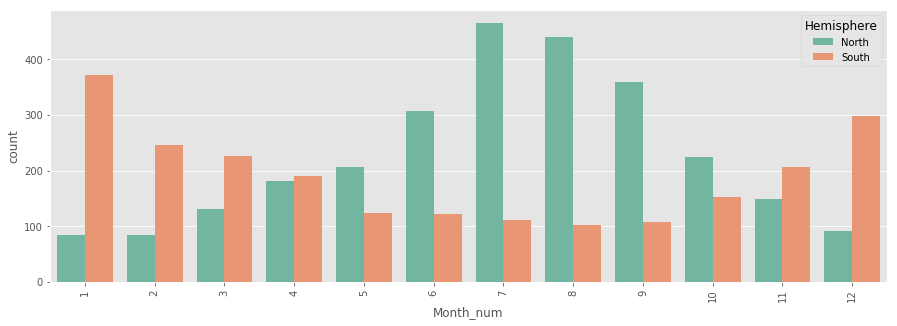

In [151]:
# try to remove NaN (0 values)
df2=df[df['Month_num']>0]
plt.figure(figsize=(15, 5))
style.use('ggplot')
sns.countplot(x='Month_num', hue = 'Hemisphere', data = df2, palette="Set2")
plt.xticks(rotation=90)

### If we analyse the seasonality depending on the Hemisphere, we can affirm now that Shark attacks use to occure in Summer and probably are related to hotter temperatures and activities during holidays period.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

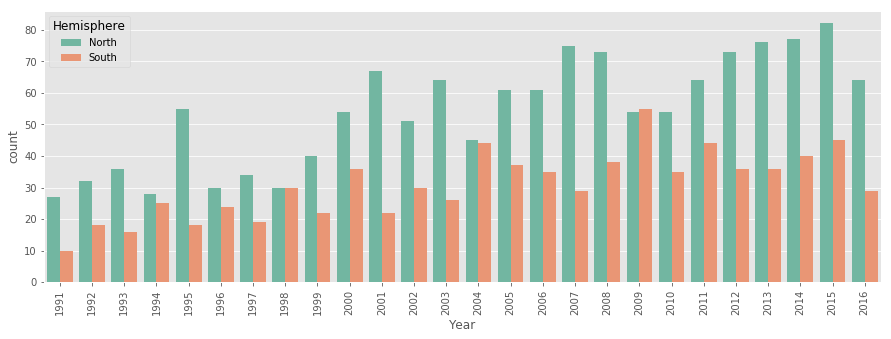

In [174]:
df2=df[df['Year']>1990]
plt.figure(figsize=(15, 5))
style.use('ggplot')
sns.countplot(x='Year', hue = 'Hemisphere', data = df2, palette="Set2")
plt.xticks(rotation=90)

### When we observe evolution per hemisphere, it's strange that when shark attacks decrease in one hemisphere, there increase in the other one.

In [134]:
df.head()

,Year,Date,Time,Country,Area,Location,Death,Species,Injury,Type,Activity,Sex,Age,Name,Hemisphere
0,2016,18-Sep-16,13h00,USA,Florida,"New Smyrna Beach, Volusia County",N,NaN,Minor injury to thigh,Unprovoked,Surfing,M,16,male,North
1,2016,18-Sep-16,11h00,USA,Florida,"New Smyrna Beach, Volusia County",N,NaN,Lacerations to hands,Unprovoked,Surfing,M,36,Chucky Luciano,North
2,2016,18-Sep-16,10h43,USA,Florida,"New Smyrna Beach, Volusia County",N,NaN,Lacerations to lower leg,Unprovoked,Surfing,M,43,male,North
3,2016,17-Sep-16,NaN,AUSTRALIA,Victoria,Thirteenth Beach,N,NaN,Struck by fin on chest & leg,Unprovoked,Surfing,M,NaN,Rory Angiolella,South
4,2016,16-Sep-16,NaN,AUSTRALIA,Victoria,Bells Beach,N,2 m shark,No injury: Knocked off board by shark,Unprovoked,Surfing,M,NaN,male,South


In [131]:
# TIME - exploratory analysis (Quick & Qualitative with uncleaned data)
df['Time'].value_counts().head(20)

Afternoon    174
11h00        123
Morning      107
12h00        107
15h00        100
16h00         94
14h00         93
16h30         72
13h00         71
14h30         70
17h30         69
17h00         64
18h00         62
15h30         62
11h30         60
Night         58
13h30         56
10h00         53
09h00         46
10h30         45
Name: Time, dtype: int64

### Sharks use to attack during the day

In [168]:
top6countries = df['Country'].value_counts().head(6)
print(top6countries)

USA                 2116
AUSTRALIA           1279
SOUTH AFRICA         565
PAPUA NEW GUINEA     133
NEW ZEALAND          125
BRAZIL               102
Name: Country, dtype: int64


In [203]:
# AREA - exploratory analysis
df['Country'] = df['Country'].astype('category')                                                                                                                                                                                                   
df['Area'].value_counts().head(20)

Florida                  990
New South Wales          468
Queensland               300
Hawaii                   282
California               276
KwaZulu-Natal            210
Western Cape Province    188
Western Australia        172
Eastern Cape Province    156
South Carolina           145
South Australia          103
North Carolina           100
Victoria                  81
Texas                     71
Pernambuco                70
Torres Strait             70
North Island              65
New Jersey                49
Tasmania                  41
South Island              39
Name: Area, dtype: int64

In [205]:
# ACTIVITY - exploratory analysis
df['Activity'].value_counts().head(15)

Surfing           904
Swimming          819
Fishing           414
Spearfishing      321
Bathing           153
Wading            144
Diving            123
Standing           97
Snorkeling         77
Scuba diving       74
Body boarding      54
Body surfing       48
Swimming           47
Treading water     32
Pearl diving       32
Name: Activity, dtype: int64

In [ ]:
# I tried many ways to 
#df['support'][df.name.str.contains('ball')] = 'ball support'
#df['sport'] = df.sport.str.replace(r'(^.*ball.*$)', 'ball sport')

#df.loc[df['sport'].str.contains('ball', case=False), 'sport'] = 'ball sport'
#df['Activity'].str.re.sub(r'(^.*body.*$)','Body boarding/surfing')
df['Activity'].loc[df['Activity'].str.contains('body', case=False)] = 'Body boarding/surfing'
df['Activity'].loc[df['Activity'].str.contains('surf', case=False)] = 'Surfing/Body boarding'
'''
    if 'body' in x: x_new = 'Body boarding/surfing'
    elif 'surf' in x : x_new = 'Surfing'
    elif 'swim' in x: x_new = 'Swimming/Bathing'
    elif 'bath' in x: x_new = 'Swimming/Bathing'
    elif 'fish' in x: x_new = 'Fishing'
    elif 'spear' in x: x_new = 'Spearfishing'
    elif 'wad' in x: x_new = 'Wading'
    elif 'div' in x: x_new = 'Diving/Scuba'
    elif 'scuba' in x: x_new = 'Diving/Scuba'
    elif 'stand' in x: x_new = 'Paddle Standing'
    elif 'padd' in x: x_new = 'Paddle Standing'
    elif 'snork' in x: x_new = 'Snorkeling'
    else: x_new = x
'''
df['Activity'].value_counts()        
#datavalue = data1[["Activity"]].stack().value_counts().index.tolist()
#data1["Activity"].value_counts()

### Surfing, Swimming and Fishing are the most common contexts of Shark attacks. Then,  during wading & diving/snorkeling activities.

In [210]:
# SPECIES - exploratory analysis
df['Species'].value_counts().head(20)

White shark                        161
Shark involvement not confirmed     80
Tiger shark                         68
Bull shark                          52
6' shark                            40
4' shark                            39
1.8 m [6'] shark                    35
1.5 m [5'] shark                    32
1.2 m [4'] shark                    27
3' shark                            25
5' shark                            25
4' to 5' shark                      23
3 m [10'] shark                     22
2 m shark                           22
No shark involvement                21
Wobbegong shark                     20
3' to 4' shark                      18
3 m shark                           16
2.4 m [8'] shark                    16
3.7 m [12'] shark                   15
Name: Species, dtype: int64

### White, Tiger and Bull sharks seems to be the most aggressive species. Then, Wobbegong and Blacktip ones.

### Data manipulation: other great idea for further analysis: Accumulative data allow us to work with more solid basis and get more significance in figures)

In [ ]:
# did not implement in the end:
def get_season(month):
    if hemisphere == north: 
        if month >= 3 and month <= 5:
            return 'spring'
        elif month >= 6 and month <= 8:
            return 'summer'
        elif month >= 9 and month <= 11:
            return 'autumn'
        else:
            return 'winter'
    elif hemisphere == south: 
        if month >= 3 and month <= 5:
            return 'autumn'
        elif month >= 6 and month <= 8:
            return 'winter'
        elif month >= 9 and month <= 11:
            return 'spring'
        else:
            return 'summer'
months_labels = months.apply(get_season)

In [ ]:

# First remove punctuation, spaces, then replace carriage return and convert to lower text:
s = re.sub(r'[^\w\s]','',poem).replace('\n', ' ').lower()
print (s)
# then split to list:
list_of_strings = s.split(" ")
print(list_of_strings)


# First remove punctuation, spaces, then replace carriage return and convert to lower text and plit:
words = re.sub(r'[^\w\s]','',poem).replace('\n', ' ').lower().split()
print(words)

# Then remove blacklist from words to get a clean list:
clean = [w for w in words if w not in blacklist]
print(clean)


# Then remove duplicated items in clean list to have unique items:
unique = set([w for w in words if w not in blacklist])
print(unique)

# Here we can compare the length of all and see how we have cleaned the data along the process
print('poem len was',len(poem),' VS then words list len was',len(words),' VS clean list len was',len(clean),' VS unique len is now',len(unique))

pattern =r"\w*\d+"
filtered_data = []
for i in data:
    if re.search(pattern,i):
        temp = re.search(pattern,i)
        print(temp)
        filtered_data.append(i)
    else:
        print(i,'NOT MATCH')
print (filtered_data)

In [206]:
# Exporting clean data in CSV using Pandas
df.to_csv("sharkattacks_clean.csv", index = False)

README.md file containing a detailed explanation of the process followed in the importing, cleaning, manipulation, 
and exporting of your data as well as your results, obstacles encountered, and lessons learned

# Shark Attacks Context In-depth Analysis in both Hemispheres

## A. Hemisphere North

In [227]:
# Be sure the variable in str type
df['Activity']=df['Activity'].astype('str')
df['Species']=df['Species'].astype('str')
df['Area']=df['Area'].astype('str')
df['Location']=df['Location'].astype('str')

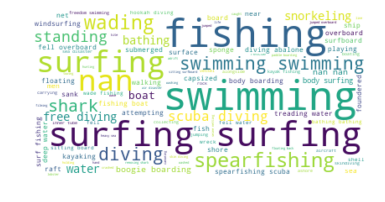

There are 46264 words analized for Activity in North Hemisphere.


In [228]:
# Capture all texts
north_activity = " ".join(i.lower().strip() for i in df[df["Hemisphere"]=="North"].Activity)
# Create and generate a word cloud image:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(north_activity)
plt.figure()
# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

print ("There are {} words analized for Activity in North Hemisphere.".format(len(north_activity)))

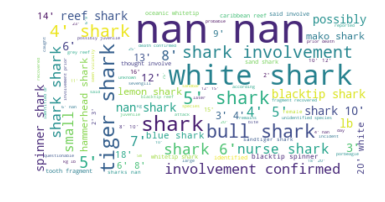

There are 43198 words analized for Species in North Hemisphere.


In [230]:
north_species = " ".join(i.lower().strip() for i in df[df["Hemisphere"]=="North"].Species)
species = re.sub('NaN','',species_txt)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(north_species)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
print ("There are {} words analized for Species in North Hemisphere.".format(len(north_species)))

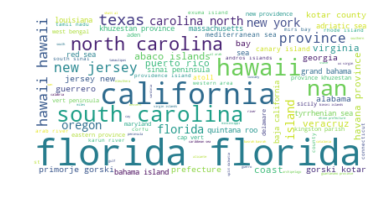

There are 31134 words analized for Area in North Hemisphere.


In [237]:
north_area = " ".join(i.lower().strip() for i in df[df["Hemisphere"]=="North"].Area)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(north_area)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
print ("There are {} words analized for Area in North Hemisphere.".format(len(north_area)))

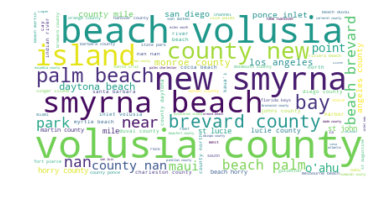

There are 79284 words analized for Location in North Hemisphere.


In [232]:
north_location = " ".join(i.lower().strip() for i in df[df["Hemisphere"]=="North"].Location)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(north_location)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
print ("There are {} words analized for Location in North Hemisphere.".format(len(north_location)))

## B. Hemisphere South

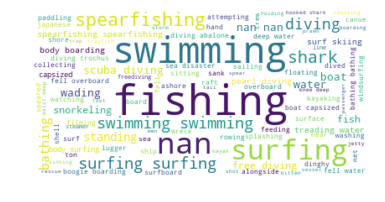

There are 39997 words analized for Activity in North Hemisphere.


In [233]:
# Capture all texts
south_activity = " ".join(i.lower().strip() for i in df[df["Hemisphere"]=="South"].Activity)
# Create and generate a word cloud image:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(south_activity)
plt.figure()
# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

print ("There are {} words analized for Activity in South Hemisphere.".format(len(south_activity)))

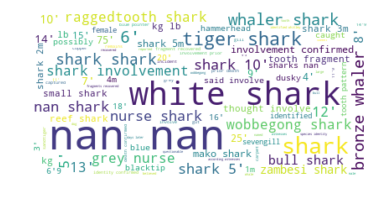

There are 34276 words analized for Species in South Hemisphere.


In [234]:
south_species = " ".join(i.lower().strip() for i in df[df["Hemisphere"]=="South"].Species)
species = re.sub('NaN','',species_txt)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(south_species)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
print ("There are {} words analized for Species in South Hemisphere.".format(len(south_species)))

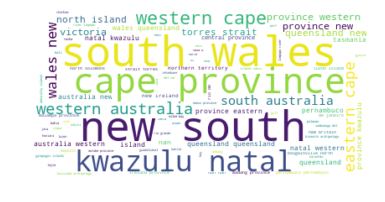

There are 37488 words analized for Area in South Hemisphere.


In [236]:
south_area = " ".join(i.lower().strip() for i in df[df["Hemisphere"]=="South"].Area)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(south_area)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
print ("There are {} words analized for Area in South Hemisphere.".format(len(south_area)))

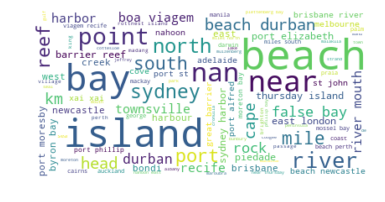

There are 46634 words analized for Location in South Hemisphere.


In [238]:
south_location = " ".join(i.lower().strip() for i in df[df["Hemisphere"]=="South"].Location)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(south_location)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
print ("There are {} words analized for Location in South Hemisphere.".format(len(south_location)))

# Summary Data flow per variable:

## Relevant Variables analysed: 
 
### Data cleaning & analysis : 
- Year --> from 1942 to 2016 --> cleaned & analized
- Date --> converted to Month (number and name) 
- Month --> cleaned & analized 
- Country --> Special analysis for TOP COUNTRIES
- Sex --> cleaned & analized
- Age --> cleaned & analized
- Fatal (Y/N) --> cleaned & analized
- Time --> qualitative analysis
- Hemisphere: --> created variable re-classifying from Country 
- Season --> (I wanted to assign season to month depending on hemisphere but not enough time)


### Qualitative Data analysis on uncleaned data: 
####  Top mentions & wordcloud - for Worldwide & Top Countries
- Activity --> (I tried to re-classify for quantitative analysis but not enough time)
- Species 
- Area 
- Location 

### Other relevant but NOT analysed : 
- Injury 


### Doubtful Variables : 
- Type  --> Analysed because it's the most structured data provided but Category labels are not clear: Boat Vs Boating / Invalid? / and some quite subjective: Provoked VS Unprovoked
- Name --> was not relevant for analysis, but I kept it in case I wanted to remove duplicated registers in the last step --> in the end, I did not proceed to duplicates dropping because I detect than some attacks reports are done for several people. (i.e in the same boat). 
I think the most appropriate process should be done like that: add a column for number of people attacked or duplicate the report for each person, so we can analyse both figures #  shark attacks and people attacked.

### Dropped Variables (no relevant)
- Case Number 
- Investigator or Source 
- pdf 
- href formula 
- href 
- Case Number.1 
- Case Number.2 
- original order
- Unnamed: 22 
- Unnamed: 23 

# Obstacles encountered:

* No so easy to directly import a dataset in the expected format in terms of coded information and variables typology.
* Difficulties when cleaning messed data, specially when strings, floats and integers are mixed.
* Not so easy to plot the data if we don't know how matplotlib or seaborn work depending on data format and arguments to manage to draw the exact chart in mind.

# Lessons learned:

* Very useful to comment each step of the process in the project to document everything and be able to re-use and optimize the data cleaning flow.
* Better analysis if we convert strings to words and then assign keywords to categories or int/float numeric data to ranges/mean/counts to then plot through Seaborn/Matplotlib
* Need to understand how matplotlib and seaborn works to do great data viz.